# 프로젝트1 : 엘라스틱서치로 코로나데이터(200124~210907)분석
* bulk데이터 로드
* 데이터 aggregation 
* matplotlib/seaborn을 사용한 시각화

In [1]:
from elasticsearch import Elasticsearch,helpers
es = Elasticsearch('http://localhost:9200/')

In [2]:
from urllib import request
import os.path
import json 
json_data = open('서울시 코로나19 확진자 현황.json','r',encoding='utf-8').read()
data = json.loads(json_data)

In [ ]:
data  # json데이터 원본

In [3]:
# 위 header컬럼 빼주고 데이터만 추출
List = data['DATA']
List

[{'corona19_mdate': '2021-09-08 10:52:26',
  'corona19_travel_history': '',
  'corona19_corrective': None,
  'corona19_id': 83808,
  'corona19_leave_status': '-',
  'corona19_contact_history': '감염경로 조사중',
  'corona19_personal': None,
  'corona19_date': '2021-09-07',
  'corona19_area': '광진구',
  'corona19_idate': '2021-09-08 10:52:26',
  'corona19_display_yn': 'Y',
  'corona19_no': None,
  'corona19_country': None,
  'corona19_moving_path': None},
 {'corona19_mdate': '2021-09-08 10:52:26',
  'corona19_travel_history': '',
  'corona19_corrective': None,
  'corona19_id': 83807,
  'corona19_leave_status': '-',
  'corona19_contact_history': '감염경로 조사중',
  'corona19_personal': None,
  'corona19_date': '2021-09-07',
  'corona19_area': '동대문구',
  'corona19_idate': '2021-09-08 10:52:26',
  'corona19_display_yn': 'Y',
  'corona19_no': None,
  'corona19_country': None,
  'corona19_moving_path': None},
 {'corona19_mdate': '2021-09-08 10:52:26',
  'corona19_travel_history': '',
  'corona19_corrective'

In [4]:
List[0]

{'corona19_mdate': '2021-09-08 10:52:26',
 'corona19_travel_history': '',
 'corona19_corrective': None,
 'corona19_id': 83808,
 'corona19_leave_status': '-',
 'corona19_contact_history': '감염경로 조사중',
 'corona19_personal': None,
 'corona19_date': '2021-09-07',
 'corona19_area': '광진구',
 'corona19_idate': '2021-09-08 10:52:26',
 'corona19_display_yn': 'Y',
 'corona19_no': None,
 'corona19_country': None,
 'corona19_moving_path': None}

In [6]:
es.indices.create(index='covid_index')

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'covid_index'}

In [7]:
# 벌크 데이터 인덱스에 삽입
doc = []
for i in range(83808):
    doc.append({
        '_index' : 'covid_index',
        '_source' : List[i]
    })
helpers.bulk(es,doc)

(83808, [])

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

doc_df = []
for i in range(83808) : 
    doc_df.append(doc[i]['_source'])
df = pd.DataFrame(doc_df)
df

,corona19_mdate,corona19_travel_history,corona19_corrective,corona19_id,corona19_leave_status,corona19_contact_history,corona19_personal,corona19_date,corona19_area,corona19_idate,corona19_display_yn,corona19_no,corona19_country,corona19_moving_path
0,2021-09-08 10:52:26,,None,83808,-,감염경로 조사중,None,2021-09-07,광진구,2021-09-08 10:52:26,Y,None,None,None
1,2021-09-08 10:52:26,,None,83807,-,감염경로 조사중,None,2021-09-07,동대문구,2021-09-08 10:52:26,Y,None,None,None
2,2021-09-08 10:52:26,,None,83806,-,기타 확진자 접촉,None,2021-09-07,은평구,2021-09-08 10:52:26,Y,None,None,None
3,2021-09-08 10:52:26,,None,83805,-,기타 확진자 접촉,None,2021-09-07,강남구,2021-09-08 10:52:26,Y,None,None,None
4,2021-09-08 10:52:26,,None,83804,-,감염경로 조사중,None,2021-09-07,타시도,2021-09-08 10:52:26,Y,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83803,2021-05-27 11:08:12,,None,5,퇴원,기타 확진자 접촉,None,2020-01-31,성북구,2021-05-27 11:08:12,Y,None,None,None
83804,2021-05-27 11:08:12,중국,None,4,퇴원,해외유입,None,2020-01-30,마포구,2021-05-27 11:08:12,Y,None,None,None
83805,2021-05-27 11:08:12,,None,3,퇴원,종로구 집단발병,None,2020-01-30,종로구,2021-05-27 11:08:12,Y,None,None,None
83806,2021-05-27 11:08:12,중국,None,2,퇴원,해외유입,None,2020-01-30,중랑구,2021-05-27 11:08:12,Y,None,None,None


In [8]:
# 매핑정보 확인
# 따로 매핑을 인덱스 만들면서 설정하지 않고 자동매핑에 맡겼습니다
es.indices.get_mapping(index='covid_index')

{'covid_index': {'mappings': {'properties': {'corona19_area': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_contact_history': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_date': {'type': 'date'},
    'corona19_display_yn': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_id': {'type': 'long'},
    'corona19_idate': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_leave_status': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_mdate': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'corona19_travel_history': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}}}

## 각각의 필드 값 설명
* CORONA19_LEAVE_STATUS: 상태
* ~~CORONA19_MOVING_PATH: 이동경로~~
* CORONA19_MDATE: 수정일
* ~~CORONA19_NO: 환자번호~~
* CORONA19_TRAVEL_HISTORY: 여행력
* ~~CORONA19_COUNTRY: 국적~~
* ~~CORONA19_PERSONAL: 환자정보~~
* CORONA19_IDATE: 등록일
* ~~CORONA19_CORRECTIVE: 조치사항~~
* CORONA19_DISPLAY_YN: 노출여부
* CORONA19_ID: 연번
* CORONA19_CONTACT_HISTORY: 접촉력
* CORONA19_DATE: 확진일
* CORONA19_AREA: 지역

### 코로나19 확진자 현황은 아래의 지침에 따라 운영되고 있습니다.

### 확진환자의 이동경로 등 정보공개 지침(1판)

### ○ (개인정보) 성별, 연령, 국적, 거주지* 및 직장명** 등 개인을 특정하는 정보를 공개하지 않음

## 따라서, NULL값을 가진 
## ~~환자번호/국적/환자정보/조치사항/이동경로의 데이터는 제거하였습니다~~

In [9]:
field = ["corona19_personal","corona19_no","corona19_country","corona19_moving_path","corona19_corrective"]

for column in field:
    es.update_by_query(index='covid_index',body=f"{
        'script' : {
            'inline' : 'ctx._source.remove({column})'
        },
        'query' : {
            'bool' : {
                'must' : {
                    'exists' : {
                        'field' : {column}
                    }
                }
            }
        }
    }"")
                       # NULL값때문에 검색자체가x --> 0값 또는 임의의 값 작성해도 된다

SyntaxError: EOL while scanning string literal (<ipython-input-9-f03b04667937>, line 4)

In [10]:
es.search(index='covid_index',body={'query':{'match':{'_id':'Jkjmw3sBP30Mjy5w_Z6I'}}})

{'took': 0,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 0, 'relation': 'eq'},
  'max_score': None,
  'hits': []}}

# Aggregation 목표
### 1. 지금(09/08)까지의 지역구별 총 확진자 수/사망자 수/퇴원자 수
### 2. 월별 확진자수 + 상태가 어떤지(미정/사망/퇴원)
### 3. 공휴일과 평일 확진자 수 비교
### 4. 해외여행력 있는 확진자는 몇명인지 + 여행대륙별 확진자 수
### 5. 접촉력필드는 어떤 값이 가장 많은가? + 종류별 구분

In [ ]:
# 가설 및 결론을 추가
# 중복 로직

### 1. 지금(09/08)까지의 지역구별 총 확진자수/사망자 수/퇴원자 수

### 1) 지역구별 총 확진자 수

In [11]:
# 지역구 숫자는 총 몇개?
es.search(index='covid_index',body={
    'size' : 0,
    'aggs' : {
        '지역구개수' : {
            'cardinality' : {
                'field' : 'corona19_area.keyword'
            }
        }
    }
})  # 27개

{'took': 8,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'지역구개수': {'value': 27}}}

In [12]:
area_covid_infection = es.search(index='covid_index',body={
    'size' : 0,
    'aggs' : {
        '지역별' : {
            'terms' : {
                'field' : 'corona19_area.keyword',
                'size' : 27
            },
            'aggs' : {
                '지역별 확진자수' : {
                    'terms' : {
                        'field' : 'corona19_id.keyword' 
                    }
                }
            }
        }
    }
})
for i in range(27):
    print(area_covid_infection['aggregations']['지역별']['buckets'][i]['key'] , ':' ,area_covid_infection['aggregations']['지역별']['buckets'][i]['doc_count'])

강남구 : 6085
송파구 : 5020
관악구 : 4666
타시도 : 3924
서초구 : 3817
강서구 : 3768
은평구 : 3646
영등포구 : 3634
동작구 : 3627
노원구 : 3371
중랑구 : 3264
성북구 : 3189
강동구 : 3162
마포구 : 3131
구로구 : 3106
양천구 : 2856
광진구 : 2838
동대문구 : 2777
성동구 : 2401
용산구 : 2398
서대문구 : 2289
기타 : 2228
도봉구 : 2194
강북구 : 2174
금천구 : 1649
종로구 : 1304
중구 : 1290


In [77]:
df_2 = pd.DataFrame(area_covid_infection['aggregations']['지역별']['buckets'])
df_2 = df_2.drop(columns = '지역별 확진자수')
df_2 = df_2.rename(columns = {'key':'지역구','doc_count':'확진자 수'})
df_2 = df_2.sort_values(by='확진자 수',ascending=False)
df_2

,지역구,확진자 수
0,강남구,6085
1,송파구,5020
2,관악구,4666
3,타시도,3924
4,서초구,3817
5,강서구,3768
6,은평구,3646
7,영등포구,3634
8,동작구,3627
9,노원구,3371


<BarContainer object of 27 artists>

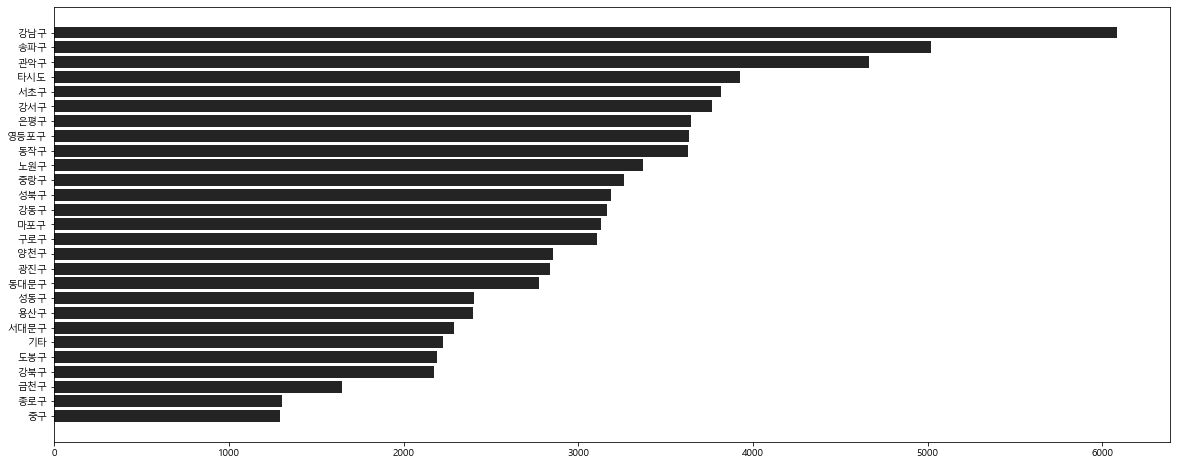

In [105]:
df_2 = df_2.sort_values(by='확진자 수')
plt.figure(figsize = (20,8))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(df_2['지역구'],df_2['확진자 수'])

### 2) 지역구별 총 사망자 수

In [13]:
area_covid_death = es.search(index='covid_index',body={
    'query' : {
      'match' : {
          'corona19_leave_status' : '사망'
      }  
    },
    'size' : 0,
    'aggs' : {
        '지역별' : {
            'terms' : {
                'field' : 'corona19_area.keyword',
                'size' : 27
            },
            'aggs' : {
                '지역별 사망자 수' : {
                    'terms' : {
                        'field' : 'corona19_id.keyword'
                    }
                }
            }
        }
    }
})
for i in range(27):
    print(area_covid_death['aggregations']['지역별']['buckets'][i]['key'] , ':' ,area_covid_death['aggregations']['지역별']['buckets'][i]['doc_count'])

기타 : 92
타시도 : 42
관악구 : 27
노원구 : 26
양천구 : 26
영등포구 : 26
강동구 : 25
성북구 : 25
송파구 : 23
은평구 : 22
강남구 : 21
강서구 : 21
광진구 : 19
마포구 : 19
서초구 : 19
성동구 : 19
구로구 : 17
동대문구 : 17
동작구 : 17
중랑구 : 17
도봉구 : 16
강북구 : 14
금천구 : 10
서대문구 : 10
종로구 : 10
용산구 : 7
중구 : 7


In [108]:
df_3 = pd.DataFrame(area_covid_death['aggregations']['지역별']['buckets'])
df_3 = df_3.drop(columns = '지역별 사망자 수')
df_3 = df_3.rename(columns = {'key':'지역구','doc_count':'사망자 수'})
df_3 = df_3.sort_values(by='사망자 수',ascending=False)
df_3

,지역구,사망자 수
0,기타,92
1,타시도,42
2,관악구,27
3,노원구,26
4,양천구,26
5,영등포구,26
6,강동구,25
7,성북구,25
8,송파구,23
9,은평구,22


<BarContainer object of 27 artists>

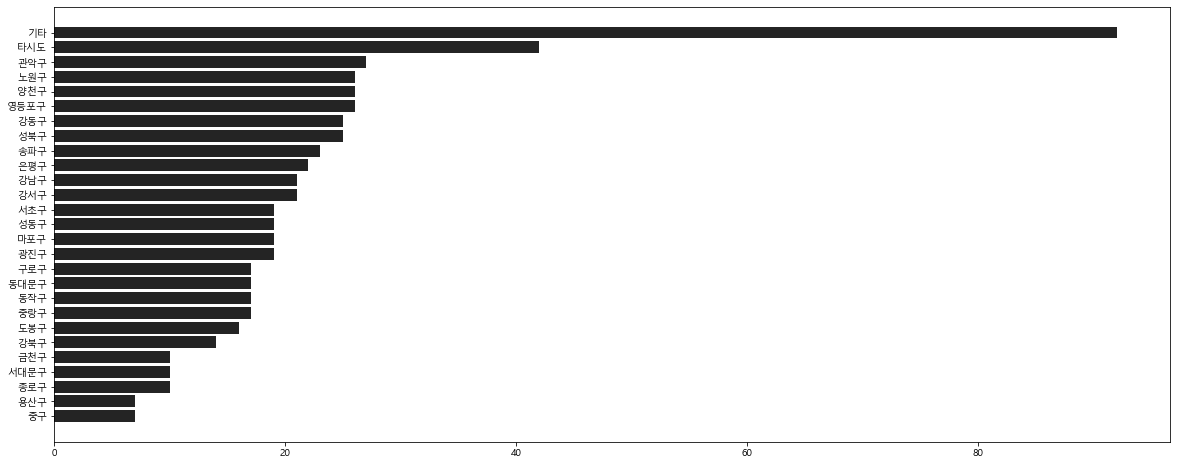

In [110]:
df_3 = df_3.sort_values(by='사망자 수')
plt.figure(figsize = (20,8))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(df_3['지역구'],df_3['사망자 수'])

### 3) 지역구별 총 퇴원자 수

In [111]:
area_covid_heal = es.search(index='covid_index',body={
    'query' : {
      'match' : {
          'corona19_leave_status' : '퇴원'
      }  
    },
    'size' : 0,
    'aggs' : {
        '지역별' : {
            'terms' : {
                'field' : 'corona19_area.keyword',
                'size' : 27
            },
            'aggs' : {
                '지역별 퇴원자 수' : {
                    'terms' : {
                        'field' : 'corona19_id.keyword'
                    }
                }
            }
        }
    }
})
for i in range(27):
    print(area_covid_heal['aggregations']['지역별']['buckets'][i]['key'] , ':' ,area_covid_heal['aggregations']['지역별']['buckets'][i]['doc_count'])

강남구 : 5258
송파구 : 4532
관악구 : 3952
강서구 : 3387
타시도 : 3379
서초구 : 3369
동작구 : 3252
은평구 : 3146
노원구 : 3123
영등포구 : 2995
중랑구 : 2923
성북구 : 2897
강동구 : 2852
마포구 : 2779
구로구 : 2602
양천구 : 2508
광진구 : 2494
동대문구 : 2458
용산구 : 2229
성동구 : 2168
기타 : 2111
서대문구 : 2034
도봉구 : 2027
강북구 : 1982
금천구 : 1424
종로구 : 1172
중구 : 1124


C:\Users\NSHC\anaconda3\lib\site-packages\elasticsearch\connection\base.py:208: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.14/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


In [114]:
df_4 = pd.DataFrame(area_covid_heal['aggregations']['지역별']['buckets'])
df_4 = df_4.drop(columns = '지역별 퇴원자 수')
df_4 = df_4.rename(columns = {'key':'지역구','doc_count':'퇴원자 수'})
df_4 = df_4.sort_values(by='퇴원자 수',ascending=False)
df_4

,지역구,퇴원자 수
0,강남구,5258
1,송파구,4532
2,관악구,3952
3,강서구,3387
4,타시도,3379
5,서초구,3369
6,동작구,3252
7,은평구,3146
8,노원구,3123
9,영등포구,2995


<BarContainer object of 27 artists>

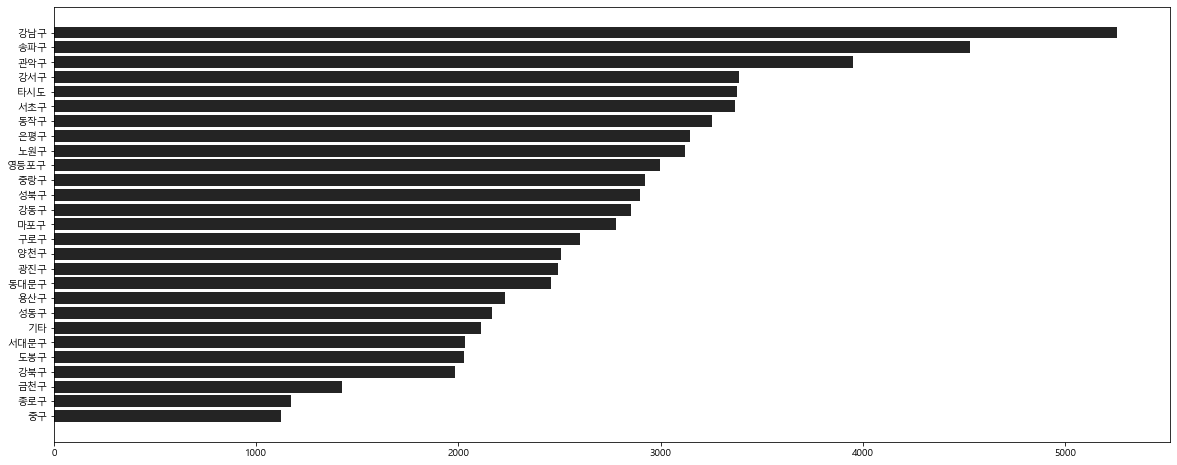

In [117]:
df_4 = df_4.sort_values(by='퇴원자 수')
plt.figure(figsize = (20,8))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(df_4['지역구'],df_4['퇴원자 수'])

## 2. ~~월별 확진자수 + 상태가 어떤지(미정/사망/퇴원)~~
## 2. 월별 확진자/사망/퇴원자 수

In [15]:
from datetime import datetime
last = datetime(2021,9,7)
first = datetime(2020,1,1)
(last-first).days / 30
# --> 21개월

20.5

In [16]:
# 월별 확진자수
inf_per_month = es.search(index='covid_index',body={
    'size' : 0,
    'aggs' : {
        '월별' : {
            'date_histogram' : {
                'field' : 'corona19_date',
                'interval' : 'month'
            }
        }
    }
})
for i in range(21) :
    print(inf_per_month['aggregations']['월별']['buckets'][i]['key_as_string'][:7], ':', inf_per_month['aggregations']['월별']['buckets'][i]['doc_count'])

2020-01 : 7
2020-02 : 80
2020-03 : 391
2020-04 : 156
2020-05 : 229
2020-06 : 459
2020-07 : 281
2020-08 : 2415
2020-09 : 1306
2020-10 : 733
2020-11 : 2904
2020-12 : 10432
2021-01 : 4878
2021-02 : 4060
2021-03 : 3897
2021-04 : 5803
2021-05 : 6030
2021-06 : 6258
2021-07 : 14504
2021-08 : 15194
2021-09 : 3791


C:\Users\NSHC\anaconda3\lib\site-packages\elasticsearch\connection\base.py:208: ElasticsearchWarning: [interval] on [date_histogram] is deprecated, use [fixed_interval] or [calendar_interval] in the future.
  warnings.warn(message, category=ElasticsearchWarning)


In [129]:
df_5 = pd.DataFrame(inf_per_month['aggregations']['월별']['buckets'])
df_5['key_as_string'] = df_5['key_as_string'].apply(lambda x: str(x))
df_5['key_as_string'] = df_5['key_as_string'].apply(lambda x: x[:7])
df_5 = df_5.drop(columns='key')
df_5 = df_5.rename(columns = {'key_as_string' : '월별','doc_count':'확진자 수'})
df_5.sort_values(by='확진자 수',ascending=False)

,월별,확진자 수
19,2021-08,15194
18,2021-07,14504
11,2020-12,10432
17,2021-06,6258
16,2021-05,6030
15,2021-04,5803
12,2021-01,4878
13,2021-02,4060
14,2021-03,3897
20,2021-09,3791


C:\Users\NSHC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='월별', ylabel='확진자 수'>

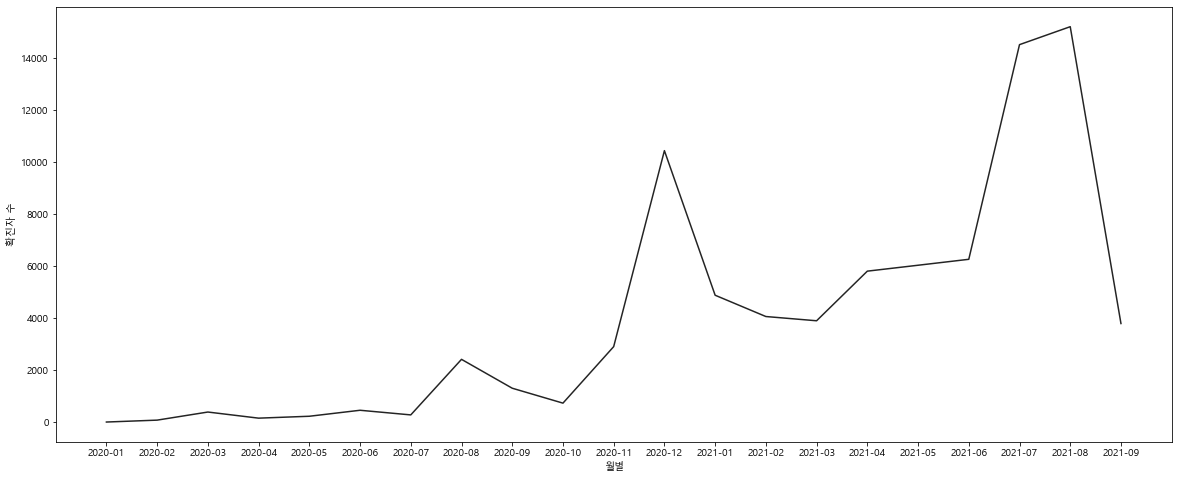

In [128]:
plt.figure(figsize = (20,8))
sns.lineplot(df_5['월별'],df_5['확진자 수'])

In [17]:
# 월별 확진자들의 추후 상태(미정/퇴원/사망)등에 대해 알고 싶었으나 확인 불가
# 개인식별 ID 없음.... --> 그냥 월별 사망자/퇴원자에 대해서 추가 집계

In [18]:
# 월별 사망자 수
death_per_month = es.search(index='covid_index',body={
    'query' : {
        'match' : {
            'corona19_leave_status' : '사망'
        }
    },
    'size' : 0,
    'aggs' : {
        '월별 사망자 수' : {
            'date_histogram' : {
                'field' : 'corona19_date',
                'interval' : 'month'
            }
        }
    }
})
for i in range(20) :
    print(death_per_month['aggregations']['월별 사망자 수']['buckets'][i]['key_as_string'][:7], ':', death_per_month['aggregations']['월별 사망자 수']['buckets'][i]['doc_count'])

2020-02 : 1
2020-03 : 3
2020-04 : 0
2020-05 : 0
2020-06 : 7
2020-07 : 4
2020-08 : 39
2020-09 : 24
2020-10 : 7
2020-11 : 44
2020-12 : 177
2021-01 : 65
2021-02 : 49
2021-03 : 25
2021-04 : 28
2021-05 : 38
2021-06 : 23
2021-07 : 30
2021-08 : 29
2021-09 : 1


In [130]:
df_6 = pd.DataFrame(death_per_month['aggregations']['월별 사망자 수']['buckets'])
df_6['key_as_string'] = df_6['key_as_string'].apply(lambda x: str(x))
df_6['key_as_string'] = df_6['key_as_string'].apply(lambda x: x[:7])
df_6 = df_6.drop(columns='key')
df_6 = df_6.rename(columns = {'key_as_string' : '월별','doc_count':'사망자 수'})
df_6.sort_values(by='사망자 수',ascending=False)

,월별,사망자 수
10,2020-12,177
11,2021-01,65
12,2021-02,49
9,2020-11,44
6,2020-08,39
15,2021-05,38
17,2021-07,30
18,2021-08,29
14,2021-04,28
13,2021-03,25


C:\Users\NSHC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='월별', ylabel='사망자 수'>

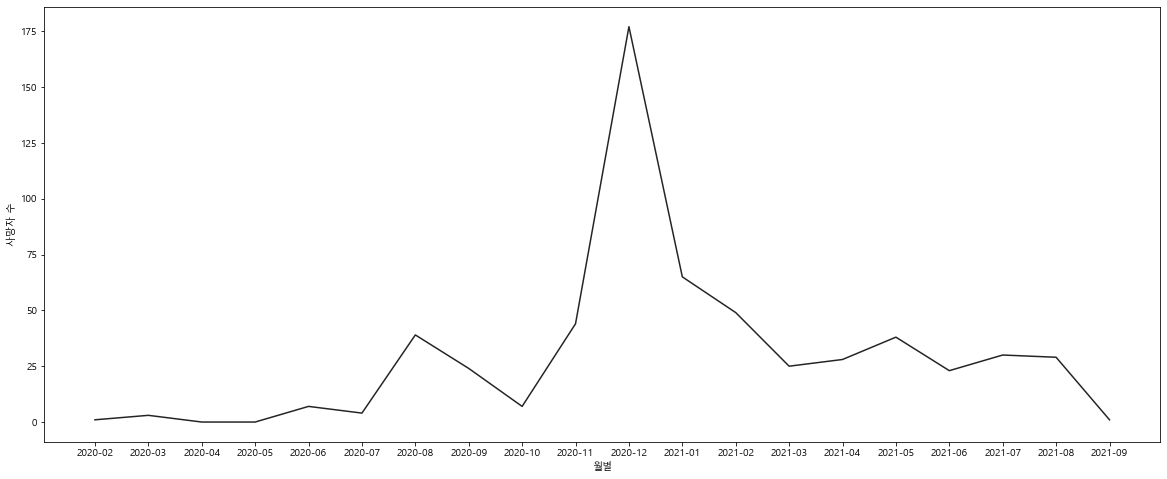

In [131]:
plt.figure(figsize = (20,8))
sns.lineplot(df_6['월별'],df_6['사망자 수'])

In [19]:
# 월별 퇴원자 수
heal_per_month = es.search(index='covid_index',body={
    'query' : {
        'match' : {
            'corona19_leave_status' : '퇴원'
        }
    },
    'size' : 0,
    'aggs' : {
        '월별 퇴원자 수' : {
            'date_histogram' : {
                'field' : 'corona19_date',
                'interval' : 'month'
            }
        }
    }
})
for i in range(21) :
    print(heal_per_month['aggregations']['월별 퇴원자 수']['buckets'][i]['key_as_string'][:7], ':', heal_per_month['aggregations']['월별 퇴원자 수']['buckets'][i]['doc_count'])

2020-01 : 7
2020-02 : 79
2020-03 : 388
2020-04 : 156
2020-05 : 229
2020-06 : 452
2020-07 : 277
2020-08 : 2376
2020-09 : 1282
2020-10 : 726
2020-11 : 2860
2020-12 : 10255
2021-01 : 4813
2021-02 : 4011
2021-03 : 3872
2021-04 : 5774
2021-05 : 5992
2021-06 : 6222
2021-07 : 13991
2021-08 : 10407
2021-09 : 8


In [ ]:
# match --> bool filter 

In [132]:
df_7 = pd.DataFrame(heal_per_month['aggregations']['월별 퇴원자 수']['buckets'])
df_7['key_as_string'] = df_7['key_as_string'].apply(lambda x: str(x))
df_7['key_as_string'] = df_7['key_as_string'].apply(lambda x: x[:7])
df_7 = df_7.drop(columns='key')
df_7 = df_7.rename(columns = {'key_as_string' : '월별','doc_count':'퇴원자 수'})
df_7.sort_values(by='퇴원자 수',ascending=False)

,월별,퇴원자 수
18,2021-07,13991
19,2021-08,10407
11,2020-12,10255
17,2021-06,6222
16,2021-05,5992
15,2021-04,5774
12,2021-01,4813
13,2021-02,4011
14,2021-03,3872
10,2020-11,2860


C:\Users\NSHC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='월별', ylabel='퇴원자 수'>

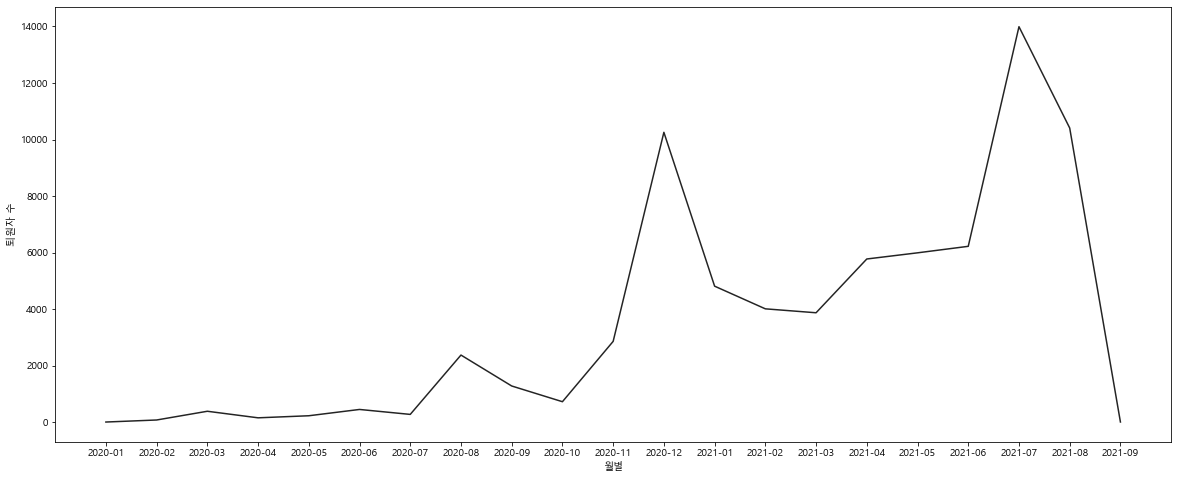

In [133]:
plt.figure(figsize = (20,8))
sns.lineplot(df_7['월별'],df_7['퇴원자 수'])

## 3. 공휴일과 평일의 확진자 수 비교
### 이 파트는 따로 range를 사용해서 나눠줄까 하다가
### 그냥 전체 json을 DataFrame화 한후 새 필드(holiday)를 추가하려고 합니다
* holiday : 0  --> 평일
* holiday : 1  --> 주말(공휴일)

In [167]:
df['corona19_date'] = pd.to_datetime(df['corona19_date'])
df['dayofweek'] = df['corona19_date'].dt.dayofweek
df['holiday'] = 0
df.loc[(df['dayofweek'] == 5) | (df['dayofweek'] == 6),'holiday'] = 1
qwer = df.groupby('holiday')['corona19_mdate'].count().reset_index()
qwer = qwer.rename(columns = {'corona19_mdate':'확진자 수'})
qwer

,holiday,확진자 수
0,0,62474
1,1,21334


## 4. 해외여행력 있는 확진자는 몇명인지 + 여행대륙별 확진자 수
### 1) 해외여행을 갔다온 확진자 집계

In [21]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'must_not' : {
                'match' : {
                    'corona19_travel_history.keyword': ''
                }
            }
        }
    },
    'size' : 0,
    'aggs' : {
        '여행력있는 확진자 총합 ' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'
            }
        }
    }
})  # 1625명

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1625, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'여행력있는 확진자 총합 ': {'value': 1625}}}

## 2) 국가별 확진자 수 확인

In [22]:
es.search(index='covid_index',body={
    'size' : 0,
    'aggs' : {
        '여행력 사이즈' : {
            'cardinality' : {
                'field' : 'corona19_travel_history.keyword'
            }
        }
    }
})   # 총 174 종류
# cardinality 옵션을 찾아 정확도를 높일수 있음 --> 시스템의 부하를 유발가능
# 국가별 확진자수를 따로 뽑아 데이터를 찾아와주는게 나음

{'took': 6,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'여행력 사이즈': {'value': 174}}}

In [23]:
# 옵션을 주기
# '-' , '(공백)' , '이름 둘중에 뭐가 맞는지 확인 필요' , '마포행복나눔마켓' 과 같은 단어들을 필터링할 필요성 존재
# minimum_doc_count : 5 로 설정해보았음!
# 공백값 9개를 빼주기 위해서 query 조건주기

es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'must_not' : {
                'match' : {
                    'corona19_travel_history.keyword' : ' '
                }
            }
        }
    },
    'size' : 0,
    'aggs' : {
        '여행력 필터링 집계' : {
            'terms' : {
                'field' : 'corona19_travel_history.keyword',
                'size' : 174,
                'min_doc_count' : 5
            }
        } 
    }
})

{'took': 6,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'여행력 필터링 집계': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': '', 'doc_count': 82183},
    {'key': '미국', 'doc_count': 442},
    {'key': '유럽', 'doc_count': 140},
    {'key': '아시아', 'doc_count': 139},
    {'key': '인도네시아', 'doc_count': 72},
    {'key': '러시아', 'doc_count': 71},
    {'key': '일본', 'doc_count': 45},
    {'key': '영국', 'doc_count': 36},
    {'key': '필리핀', 'doc_count': 36},
    {'key': '우즈베키스탄', 'doc_count': 35},
    {'key': '터키', 'doc_count': 27},
    {'key': '독일', 'doc_count': 24},
    {'key': '인도', 'doc_count': 23},
    {'key': '중국', 'doc_count': 23},
    {'key': '몽골', 'doc_count': 22},
    {'key': '카자흐스탄', 'doc_count': 20},
    {'key': '파키스탄', 'doc_count': 20},
    {'key': '프랑스', 'doc_count': 20},
    {'key': '방글라데시', 'doc_coun

In [24]:
# 위 결과를 그룹별로 묶고싶어졌다
# 북미
es.search(index='covid_index',body={
    'query' : {
        'terms' : {
            'corona19_travel_history.keyword' : ['미국', '캐나다', '멕시코', '북미']            
        }
    },
    'size' : 0,
    'aggs' : {
        '북미' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'            
            }
        }
    }
})  # 479명

{'took': 1,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 479, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'북미': {'value': 479}}}

In [25]:
# 남미
es.search(index='covid_index',body={
    'query' : {
        'terms' : {
            'corona19_travel_history.keyword' : ['남미', '브라질']            
        }
    },
    'size' : 0,
    'aggs' : {
        '남미' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'            
            }
        }
    }
})   # 21명

{'took': 1,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 21, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'남미': {'value': 21}}}

In [26]:
# 유럽
es.search(index='covid_index',body={
    'query' : {
        'terms' : {
            'corona19_travel_history.keyword' : ['유럽','영국','터키','독일','프랑스','폴란드','헝가리',
                                                 '스웨덴','우크라이나','덴마크','체코']            
        }
    },
    'size' : 0,
    'aggs' : {
        '유럽' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'            
            }
        }
    }
})  # 293

{'took': 1,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 293, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'유럽': {'value': 293}}}

In [27]:
# 중동 및 아시아
es.search(index='covid_index',body={
    'query' : {
        'terms' : {
            'corona19_travel_history.keyword' : ['아시아','인도네시아','필리핀','우즈베키스탄','인도','몽골',
                                                 '카자흐스탄','파키스탄','방글라데시','네팔','아랍에미리트',
                                                 '이라크','미얀마','스리랑카','UAE','아랍에미레이트','키르기스스탄']            
        }
    },
    'size' : 0,
    'aggs' : {
        '아시아' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'            
            }
        }
    }
})  # 455명

{'took': 2,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 455, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'아시아': {'value': 455}}}

In [28]:
# 아프리카
es.search(index='covid_index',body={
    'query' : {
        'terms' : {
            'corona19_travel_history.keyword' : ['아프리카','탄자니아','나이지리아']            
        }
    },
    'size' : 0,
    'aggs' : {
        '아프리카' : {
            'value_count' : {
                'field' : 'corona19_travel_history.keyword'   
            }
        }
    }
})  # 29명

{'took': 1,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 29, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'아프리카': {'value': 29}}}

## 5. 접촉력 필드는 어떤 값이 가장 많은지? + 종류별 Grouping
##### (감염경로 조사중 값은 제외)

## 1) 접촉력 필드 확인

In [29]:
# 접촉력 필드 종류 개수 확인(감염경로 조사중 제외)
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'must_not' : {
                'match' : {
                    'corona19_contact_history.keyword' : '감염경로 조사중'
                }
            }
        }
    },
    'size' : 0,
    'aggs' : {
        '접촉력 필드값 종류' : {
            'cardinality' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})

{'took': 6,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'접촉력 필드값 종류': {'value': 1024}}}

In [30]:
# 접촉력 필드값의 종류 확인
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'must_not' : {
                'match' : {
                    'corona19_contact_history.keyword' : '감염경로 조사중'
                }
            }
        }
    },
    'size' : 0,
    'aggs' : {
        'test' : {
    'terms' : {
        'field' : 'corona19_contact_history.keyword',
        'size' : 1024
    }
}
}
})
# 기타 확진자 접촉이 대부분의 값을 차지하는데 이 값도 빼는게 좋을 것 같습니다

{'took': 11,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': []},
 'aggregations': {'test': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': '기타 확진자 접촉', 'doc_count': 31562},
    {'key': '타시도 확진자 접촉', 'doc_count': 3784},
    {'key': '해외유입', 'doc_count': 1631},
    {'key': '동부구치소 관련', 'doc_count': 1175},
    {'key': '병원 및 요양시설', 'doc_count': 841},
    {'key': '성북구 사랑제일교회 관련', 'doc_count': 641},
    {'key': '강서구 교회 관련', 'doc_count': 246},
    {'key': '종로구 소재 파고다타운 관련', 'doc_count': 227},
    {'key': '구로구 소재 요양병원/요양원 관련', 'doc_count': 226},
    {'key': '강서구 댄스교습관련 시설', 'doc_count': 224},
    {'key': '용산구 소재 병원 관련', 'doc_count': 219},
    {'key': "관악구 소재 사우나 관련(\\'21.7.)", 'doc_count': 192},
    {'key': '이태원 클럽 관련', 'doc_count': 139},
    {'key': "강남구 소재 직장 관련(\\'21.7.)", 'doc_count': 138},
    {'key': '8.15서울도심집회', 'doc_cou

## 2) 종류별 Grouping
#### a. 타시도 확진자 접촉
#### b. 해외유입
#### c. 종교시설(교회 포함)
#### d. 병원 및 의료시설
#### e. 여가
#### f. 음식점 및 주점
#### g. 교육시설
#### h. 회사
#### i. 집회 및 지인모임

### a. 타시도 확진자 접촉

In [31]:
es.search(index='covid_index',body={
    'query' : {
        'match' : {
            'corona19_contact_history.keyword' : '타시도 확진자 접촉'
        }
    },
    'size' : 0,
    'aggs' : {
        '타시도 확진자 접촉' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})  # 3784명

{'took': 1,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 3784, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'타시도 확진자 접촉': {'value': 3784}}}

### b. 해외유입

In [32]:
# 해외유입
es.search(index='covid_index',body={
    'query' : {
        'match' : {
            'corona19_contact_history.keyword' : '해외유입'
        }
    },
    'size' : 0,
    'aggs' : {
        '해외유입' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})  # 1631명

{'took': 0,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1631, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'해외유입': {'value': 1631}}}

### c. 종교시설(교회 포함)
* 검색 키워드 : 종교,교회,성경을 포함하는 모든 도큐먼트

In [33]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*종교.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*교회.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*성경.*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '종교시설(교회포함)' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 2538명

{'took': 4,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2538, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'종교시설(교회포함)': {'value': 2538}}}

### d. 병원 및 의료시설
* 검색 키워드 : 병원, 의료

In [34]:
# 와일드 카드를 이용한 쿼리문 작성
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*병원*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*의료*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '병원 및 의료시설' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 2623명

{'took': 4,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2623, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'병원 및 의료시설': {'value': 2623}}}

### e. 여가
* 검색 키워드 : 체육, 헬스, 운동, 댄스, 밴드, 음악, 공연

In [35]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*체육*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*헬스*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*운동*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*댄스*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*밴드*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*음악*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*공연*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '여가' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 2254명

{'took': 11,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2254, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'여가': {'value': 2254}}}

### f. 음식점 및 주점
* 검색 키워드 : 음식점, 식당, 주점

In [36]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*음식점.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*식당.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*주점.*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '음식점 및 주점' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 1317명

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1317, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'음식점 및 주점': {'value': 1317}}}

### g. 교육시설
* 검색 키워드 : 학교, 학원, 유치원, 어린이집, 교육

In [37]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*학교*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*학원*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*유치원*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*어린이집*'
                }
            },
            {
                'wildcard' : {
                    'corona19_contact_history.keyword' : '*교육*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '교육시설' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 1719명

{'took': 10,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1719, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'교육시설': {'value': 1719}}}

### h. 회사
* 검색 키워드 : 회사, 기업, 센터

In [38]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*회사.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*기업.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*센터.*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '회사' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 751명

{'took': 2,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 751, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'회사': {'value': 751}}}

### i. 집회 및 지인모임
* 검색 키워드 : 집회, 지인, 모임

In [39]:
es.search(index='covid_index',body={
    'query' : {
        'bool' : {
            'should' : [{
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*집회.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*지인.*'
                }
            },
            {
                'regexp' : {
                    'corona19_contact_history.keyword' : '.*모임.*'
                }
            }]
        }
    },
    'size' : 0,
    'aggs' : {
        '집회 및 지인모임' : {
            'value_count' : {
                'field' : 'corona19_contact_history.keyword'
            }
        }
    }
})    # 1412명

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1412, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'집회 및 지인모임': {'value': 1412}}}